In [1]:
import openai
from PIL import Image, ImageDraw, ImageFont
from dotenv import load_dotenv
import os
import re
from openai import OpenAI
load_dotenv()
api_key = os.getenv('OPENAI_API_KEY')
print(api_key)
client = OpenAI()

# Function to generate Python code using GPT-4
def generate_python_code(design_concept, banner_size, logo_path, background_path, main_character_path, cta_path):
    prompt = f"""
    * you're a senior python developer your job is to carefully follow the given instructions to generate the required function
    ** make sure to apply those restriction and follow them directly and dont skip any of them:
    output with no introduction, no explaintation, only code
    DONT MAKE ANY MISTAKES, check if you did any
    only return python3 code, and nothing else.
    no DOCUMENATION IN THE OUTPUT
    Write a Python script that uses the Pillow library to create an ad banner. 
    Make sure you do not use obselete packages. My target pillow version = 10.4.0 and python version 3.8.0
    Return only a pure python code.
    The script should:
    1. Accept the following inputs:
        - Design concept: {design_concept}
        - Banner size: {banner_size}
        - Paths to four images: logo ({logo_path}), background ({background_path}), main character ({main_character_path}), and CTA ({cta_path})
    2. Load and resize the images appropriately.
    3. Position the images based on best practices of ad design.
    4. Add text or graphical elements if necessary.

    Output only plain text. Do not output markdown like.
    """

     # Use GPT-4 model to evaluate and generate a response
    response = client.chat.completions.create(
            model="gpt-4o",
            messages=[
                {"role": "system", "content": "You are an expert in design and advertisement analysis and writing pure python code"},
                {"role": "user", "content": prompt}
            ]
        )

    return response.choices[0].message.content

# Function to execute generated Python code
def execute_python_code(python_code):
    exec(python_code)


knowledge_dir = os.path.join('..', 'data')

# Example inputs
design_concept = "An ad banner promoting a summer sale with a bright and cheerful theme. The logo should be prominent at the top left, the main character in the center, and a call-to-action button at the bottom right."
banner_size = (800, 400)
logo_path = os.path.join(knowledge_dir, 'assets', 'lexus', 'logo.png')
background_path = os.path.join(knowledge_dir, 'assets', 'lexus', 'background.png')
main_character_path = os.path.join(knowledge_dir, 'assets', 'lexus', 'main_character.png')
cta_path = os.path.join(knowledge_dir, 'assets', 'lexus', 'cta.png')

# Generate Python code
generated_code = generate_python_code(design_concept, banner_size, logo_path, background_path, main_character_path, cta_path)
print("Generated Python Code:\n", generated_code)

# Execute generated Python code
execute_python_code(generated_code)

sk-proj-p3YRdtsIgnjNgUnGyN7kT3BlbkFJnzi3YboVzCGiUYMjvWZM
Generated Python Code:
 ```python
from PIL import Image

# Inputs
banner_size = (800, 400)
logo_path = '../data/assets/lexus/logo.png'
background_path = '../data/assets/lexus/background.png'
main_character_path = '../data/assets/lexus/main_character.png'
cta_path = '../data/assets/lexus/cta.png'

# Load images
logo = Image.open(logo_path)
background = Image.open(background_path)
main_character = Image.open(main_character_path)
cta = Image.open(cta_path)

# Resize images
logo = logo.resize((150, 150), Image.ANTIALIAS)
background = background.resize(banner_size, Image.ANTIALIAS)
main_character = main_character.resize((250, 350), Image.ANTIALIAS)
cta = cta.resize((200, 100), Image.ANTIALIAS)

# Create banner
banner = Image.new('RGBA', banner_size)
banner.paste(background, (0, 0))
banner.paste(logo, (10, 10), logo)
banner.paste(main_character, (275, 25), main_character)
banner.paste(cta, (590, 290), cta) 

# Save banner
banner.save('

SyntaxError: invalid syntax (<string>, line 1)

In [ ]:
from PIL import Image

def create_ad_banner(design_concept, banner_size, logo_path, background_path, main_character_path, cta_path):
    banner_width, banner_height = banner_size

    background = Image.open(background_path).resize(banner_size)
    logo = Image.open(logo_path).resize((int(banner_width / 5), int(banner_height / 5)))
    main_character = Image.open(main_character_path).resize((int(banner_width / 2), int(banner_height / 2)))
    cta = Image.open(cta_path).resize((int(banner_width / 5), int(banner_height / 5)))

    banner = Image.new('RGBA', banner_size)
    banner.paste(background, (0, 0))
    
    # Check if the images have alpha channels and use them accordingly
    if logo.mode == 'RGBA':
        banner.paste(logo, (0, 0), logo)
    else:
        banner.paste(logo, (0, 0))
    
    if main_character.mode == 'RGBA':
        banner.paste(main_character, ((banner_width - main_character.width) // 2, (banner_height - main_character.height) // 2), main_character)
    else:
        banner.paste(main_character, ((banner_width - main_character.width) // 2, (banner_height - main_character.height) // 2))
    
    if cta.mode == 'RGBA':
        banner.paste(cta, (banner_width - cta.width, banner_height - cta.height), cta)
    else:
        banner.paste(cta, (banner_width - cta.width, banner_height - cta.height))

    # Convert the final image to 'RGB' before saving if needed
    final_banner = banner.convert('RGB')
    return final_banner

banner = create_ad_banner(
    "Summer Sale Ad Banner", 
    (800, 400), 
    "../data/assets/lexus/logo.png", 
    "../data/assets/lexus/background.png", 
    "../data/assets/lexus/main_character.png", 
    "../data/assets/lexus/cta.png"
)

banner.save("summer_sale_banner.png")
banner.show()


Error: no "view" mailcap rules found for type "image/png"


Error: no "view" mailcap rules found for type "image/png"


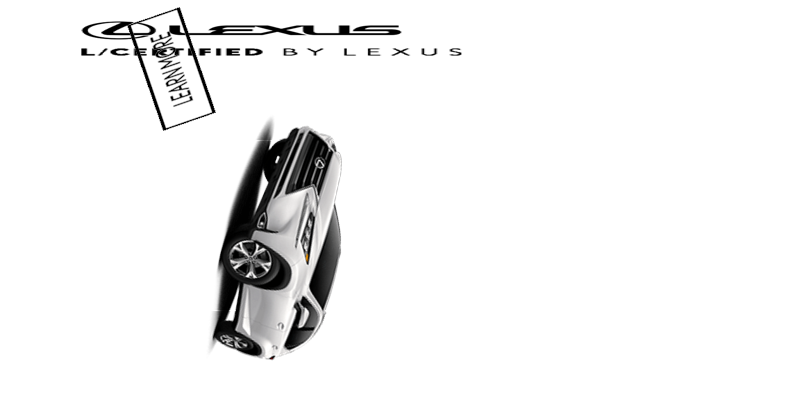

In [6]:
import os
import random
import numpy as np
from PIL import Image

def create_ad_banner(design_concept, banner_size, logo_path, background_path, main_character_path, cta_path):
    def validate_and_open_image(image_path, required_extension=None, add_alpha_if_missing=False):
        assert os.path.exists(image_path), f'Image path does not exist: {image_path}'
        if required_extension:
            assert os.path.splitext(image_path)[1].lower() == required_extension, f'Image must be a {required_extension} file: {image_path}'
        image = Image.open(image_path).convert('RGBA')
        if add_alpha_if_missing and 'A' not in image.getbands():
            alpha = Image.new('L', image.size, 255)
            image.putalpha(alpha)
        return image

    def random_transform_foreground(foreground, background_size):
        angle_degrees = random.randint(0, 359)
        foreground = foreground.rotate(angle_degrees, resample=Image.BICUBIC, expand=True)
        
        scale = random.random() * 0.5 + 0.5
        new_size = (int(foreground.size[0] * scale), int(foreground.size[1] * scale))
        foreground = foreground.resize(new_size, resample=Image.BICUBIC)
        
        max_xy_position = (background_size[0] - foreground.size[0], background_size[1] - foreground.size[1])
        assert max_xy_position[0] >= 0 and max_xy_position[1] >= 0, 'Foreground is too big for the background'
        paste_position = (random.randint(0, max_xy_position[0]), random.randint(0, max_xy_position[1]))

        return foreground, paste_position

    banner_width, banner_height = banner_size

    background = validate_and_open_image(background_path)
    background = background.resize(banner_size).convert('RGBA')
    
    logo = validate_and_open_image(logo_path, required_extension='.png', add_alpha_if_missing=True)
    main_character = validate_and_open_image(main_character_path, required_extension='.png', add_alpha_if_missing=True)
    cta = validate_and_open_image(cta_path, required_extension='.png', add_alpha_if_missing=True)

    logo, logo_pos = random_transform_foreground(logo.resize((int(banner_width / 5), int(banner_height / 5))), banner_size)
    main_character, main_character_pos = random_transform_foreground(main_character.resize((int(banner_width / 2), int(banner_height / 2))), banner_size)
    cta, cta_pos = random_transform_foreground(cta.resize((int(banner_width / 5), int(banner_height / 5))), banner_size)
    
    banner = Image.new('RGBA', banner_size)
    banner.paste(background, (0, 0))
    banner.paste(logo, logo_pos, logo)
    banner.paste(main_character, main_character_pos, main_character)
    banner.paste(cta, cta_pos, cta)

    return banner

# Example usage
knowledge_dir = "../data"
design_concept = "An ad banner promoting a summer sale with a bright and cheerful theme. The logo should be prominent at the top left, the main character in the center, and a call-to-action button at the bottom right."
banner_size = (800, 400)
logo_path = os.path.join(knowledge_dir, 'assets', 'lexus', 'logo.png')
background_path = os.path.join(knowledge_dir, 'assets', 'lexus', 'background.png')
main_character_path = os.path.join(knowledge_dir, 'assets', 'lexus', 'main_character.png')
cta_path = os.path.join(knowledge_dir, 'assets', 'lexus', 'cta.png')

banner = create_ad_banner(
    design_concept=design_concept, 
    banner_size=banner_size, 
    logo_path=logo_path, 
    background_path=background_path, 
    main_character_path=main_character_path, 
    cta_path=cta_path
)

banner.show()


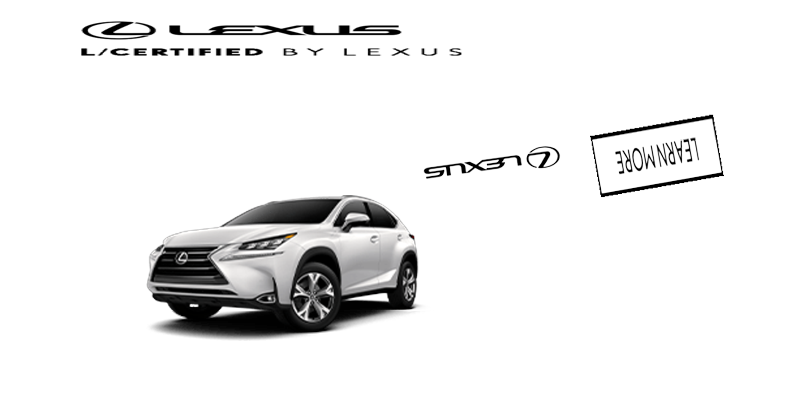

In [7]:
import os
import random
import numpy as np
from PIL import Image

def create_ad_banner(design_concept, banner_size, logo_path, background_path, main_character_path, cta_path):
    def validate_and_open_image(image_path, required_extension=None, add_alpha_if_missing=False):
        assert os.path.exists(image_path), f'Image path does not exist: {image_path}'
        if required_extension:
            assert os.path.splitext(image_path)[1].lower() == required_extension, f'Image must be a {required_extension} file: {image_path}'
        image = Image.open(image_path).convert('RGBA')
        if add_alpha_if_missing and 'A' not in image.getbands():
            alpha = Image.new('L', image.size, 255)
            image.putalpha(alpha)
        return image

    def random_transform_foreground(foreground, background_size, rotate=True):
        if rotate:
            angle_degrees = random.randint(0, 359)
            foreground = foreground.rotate(angle_degrees, resample=Image.BICUBIC, expand=True)
        
        scale = random.random() * 0.5 + 0.5
        new_size = (int(foreground.size[0] * scale), int(foreground.size[1] * scale))
        foreground = foreground.resize(new_size, resample=Image.BICUBIC)
        
        max_xy_position = (background_size[0] - foreground.size[0], background_size[1] - foreground.size[1])
        assert max_xy_position[0] >= 0 and max_xy_position[1] >= 0, 'Foreground is too big for the background'
        paste_position = (random.randint(0, max_xy_position[0]), random.randint(0, max_xy_position[1]))

        return foreground, paste_position

    banner_width, banner_height = banner_size

    background = validate_and_open_image(background_path)
    background = background.resize(banner_size).convert('RGBA')
    
    logo = validate_and_open_image(logo_path, required_extension='.png', add_alpha_if_missing=True)
    main_character = validate_and_open_image(main_character_path, required_extension='.png', add_alpha_if_missing=True)
    cta = validate_and_open_image(cta_path, required_extension='.png', add_alpha_if_missing=True)

    logo, logo_pos = random_transform_foreground(logo.resize((int(banner_width / 5), int(banner_height / 5))), banner_size)
    main_character, main_character_pos = random_transform_foreground(main_character.resize((int(banner_width / 2), int(banner_height / 2))), banner_size, rotate=False)
    cta, cta_pos = random_transform_foreground(cta.resize((int(banner_width / 5), int(banner_height / 5))), banner_size)
    
    banner = Image.new('RGBA', banner_size)
    banner.paste(background, (0, 0))
    banner.paste(logo, logo_pos, logo)
    banner.paste(main_character, main_character_pos, main_character)
    banner.paste(cta, cta_pos, cta)

    return banner

# Example usage
knowledge_dir = "../data"
design_concept = "An ad banner promoting a summer sale with a bright and cheerful theme. The logo should be prominent at the top left, the main character in the center, and a call-to-action button at the bottom right."
banner_size = (800, 400)
logo_path = os.path.join(knowledge_dir, 'assets', 'lexus', 'logo.png')
background_path = os.path.join(knowledge_dir, 'assets', 'lexus', 'background.png')
main_character_path = os.path.join(knowledge_dir, 'assets', 'lexus', 'main_character.png')
cta_path = os.path.join(knowledge_dir, 'assets', 'lexus', 'cta.png')

banner = create_ad_banner(
    design_concept=design_concept, 
    banner_size=banner_size, 
    logo_path=logo_path, 
    background_path=background_path, 
    main_character_path=main_character_path, 
    cta_path=cta_path
)

banner.show()
